![cropped-SummerWorkshop_Header.png](../../resources/cropped-SummerWorkshop_Header.png)

<h1 align="center">Allen Brain Observatory Visual Behavior Ophys </h1> 
<h2 align="center"> SWDB 2024 - Day 1 </h2> 
<h3 align="center"> Afternoon Session </h3> 

The Allen Brain Observatory Visual Behavior Ophys dataset used in vivo 2-photon calcium imaging (also called optical physiology, or “ophys”) to measure the activity of genetically identified neurons in the visual cortex of mice performing a go/no-go visual change detection task. This dataset can be used to evaluate the influence of experience, expectation, and task engagement on neural coding and dynamics in excitatory and inhibitory cell populations. 

***What kind of questions can you answer with this dataset?***

In this dataset, populations of excitatory or inhibitory neurons were tracked across multiple days of task performance under varying sensory and behavioral conditions, including active behavior and passive viewing, as well as familiar and novel stimuli. In a subset of recordings, multiple cortical areas and depths were simultaneously recorded. The dataset also contains the full training history of all mice as they learned the task across several learning stages. 

This makes the dataset appropriate for questions about coding for sensory, behavioral, and task features in specific cell populations, as well as analysis of changes in activity patterns over time.

- Do excitatory and inhibitory neuron types represent distinct features of stimulus, behavior, or task variables?
- How do coding properties change with novelty and familiarization?
- Do interactions across cortical areas or depths fluctuate as animal's engagement and motivation changes?
- Are there unique subnetworks or ensembles that represent particular types of information?
- Do network interactions reorganize as stimuli become familiar? Do they depend on task engagement?
- How does expectation alter neural representations? Are there surprise signals in the visual cortex?
- Can you predict behavioral choices from neural activity? Which cell populations are most predictive?
- How do animals learn the behavioral task? What strategies do they take?
- Does animal learning progression influence activity patterns in well trained mice? 

These are just some of the questions that might be addressed from this type of data.  


**Databook**

The databook is your one-stop-shop for understanding the various dimensions of this dataset, the methods used, and how to access the data that you are interested in. 

You can find the pages for the Visual Behavior Ophys dataset here: https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html 

![vbo_databook.png](../../resources/vbo_databook.png)

Using the Python objects we'll show you below, you can extract information about this dataset such as which genetically defined cell populations were imaged, which session types are available, and how to find the same neurons across multiple sessions. 

The available data for each session includes: 
- Calcium fluorescence traces and deconvolved events representing neural activity
- Running speed and pupil area as measures of arousal and behavioral state
- Stimulus presentation times, including times of image changes and image omissions
- Licking responses and reward times associated with task performance
- Average projection images of 2-photon movies to visualize spatial organization of recorded neurons

## Accessing the data cache

In [1]:
# We need to import these modules to get started
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn makes pretty plots & sets font sizes nicely
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

# magic functions for jupyter notebook plotting
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# confirm that you are currently using the newest version of SDK (2.16.2)
import allensdk
allensdk.__version__

'2.16.2'

The code below shows you how to use the `VisualBehaviorOphysProjectCache` class to load metadata tables & explore the features of the dataset.

In [3]:
# This is the directory where files will be saved
# If using Code Ocean, this should link to the data directory, where the files will already be available
# output_dir = r'/scratch/'
output_dir = r'/Users/marinag/Documents/Data/visual_behavior_ophys_cache_dir'

In [4]:
# import behavior projet cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=output_dir)

/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[sti

The cache contains methods that allow you to explore the types of recording sessions that exist in the dataset, and to load the data for individual experiments.

### Load all cache tables

In [5]:
# There are 4 metadata tables associated with the Visual Behavior Ophys dataset
behavior_session_table = cache.get_behavior_session_table()  
ophys_session_table = cache.get_ophys_session_table()   
ophys_experiment_table = cache.get_ophys_experiment_table()    
ophys_cells_table = cache.get_ophys_cells_table()                         


#print number of items in each table 
print('Number of behavior sessions = {}'.format(len(behavior_session_table)))
print('Number of ophys sessions = {}'.format(len(ophys_session_table)))
print('Number of ophys experiments = {}'.format(len(ophys_experiment_table)))
print('Number of unique cells = {}'.format(len(ophys_cells_table.cell_specimen_id.unique())))

Number of behavior sessions = 4782
Number of ophys sessions = 703
Number of ophys experiments = 1936
Number of unique cells = 50476


You can check the DataBook to learn more about the different tables, including what all of the columns mean:


https://allenswdb.github.io/physiology/ophys/visual-behavior/VBO-Dataset.html#vbo-metadata-tables


![vbo_metadata_tables.png](../../resources/vbo_metadata_tables.png)

## Plot behavior data for one session

For now we will grab one behavior session and load the data

In [6]:
# Grab a behavior_session_id
behavior_session_id = behavior_session_table[behavior_session_table.session_type=='OPHYS_3_images_A'].index.values[9]

In [7]:
# Load the dataset for the behavior_session_id we selected 
behavior_session = cache.get_behavior_session(behavior_session_id)

/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


### Plot running speed and stimulus blocks

In [8]:
running_speed = behavior_session.running_speed.copy()
running_speed

,timestamps,speed
0,6.42775,0.122223
1,6.44442,5.685699
2,6.46101,11.025010
3,6.47772,15.904162
4,6.49450,20.115718
...,...,...
270126,4512.73578,14.224812
270127,4512.75246,13.181842
270128,4512.76914,12.043711
270129,4512.78582,10.826884


Text(0.5, 0, 'Time in session (seconds)')

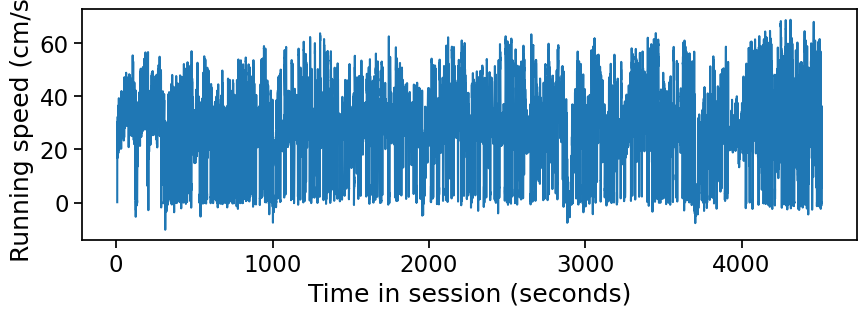

In [9]:
# Plot running alone
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(running_speed.timestamps, running_speed.speed)
ax.set_ylabel('Running speed (cm/s)')
ax.set_xlabel('Time in session (seconds)')

In [10]:
# Get stimulus presentations
stimulus_presentations = behavior_session.stimulus_presentations.copy()
stimulus_presentations.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,is_sham_change,stimulus_name,active
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
0,0,initial_gray_screen_5min,-99,NaN,-99,306.45948,0.00000,306.45948,0,17983,False,<NA>,<NA>,-99,0,-99,False,spontaneous,False
1,1,change_detection_behavior,0,im065,-99,0.25018,306.45948,306.70966,17983,17998,False,False,False,-99,1,0,False,Natural_Images_Lum_Matched_set_training_2017,True
2,1,change_detection_behavior,0,im065,-99,0.25023,307.21007,307.46030,18028,18043,False,False,False,-99,2,0,False,Natural_Images_Lum_Matched_set_training_2017,True
3,1,change_detection_behavior,0,im065,-99,0.25002,307.96084,308.21086,18073,18088,False,False,False,-99,3,0,False,Natural_Images_Lum_Matched_set_training_2017,True
4,1,change_detection_behavior,0,im065,-99,0.25017,308.71132,308.96149,18118,18133,False,False,False,-99,4,0,False,Natural_Images_Lum_Matched_set_training_2017,True


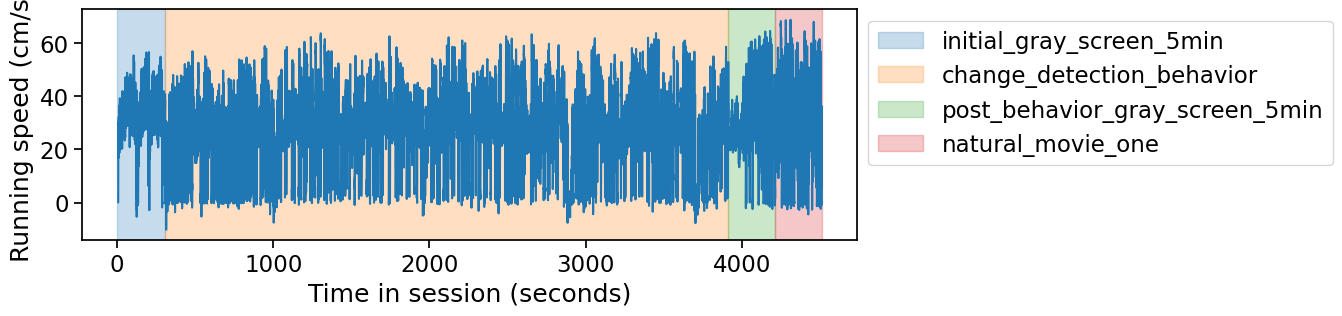

In [11]:
# Plot running speed with stimulus blocks in different colors

# Running speed
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(running_speed.timestamps, running_speed.speed)
ax.set_ylabel('Running speed (cm/s)')
ax.set_xlabel('Time in session (seconds)')

# Iterate through stimulus blocks and show them in color
colors = sns.color_palette()
for i, stimulus_block_name in enumerate(stimulus_presentations.stimulus_block_name.unique()): 
    stimulus_block_data = stimulus_presentations[stimulus_presentations.stimulus_block_name==stimulus_block_name]
    ax.axvspan(xmin=stimulus_block_data.start_time.values[0], xmax=stimulus_block_data.end_time.values[-1], 
               color=colors[i], alpha=0.25, label=stimulus_block_name)
ax.legend(bbox_to_anchor=(1,1))

Theres a lot going on there, let's zoom in

### Plot running speed before and after an image change

(433.07084999999995, 453.07084999999995)

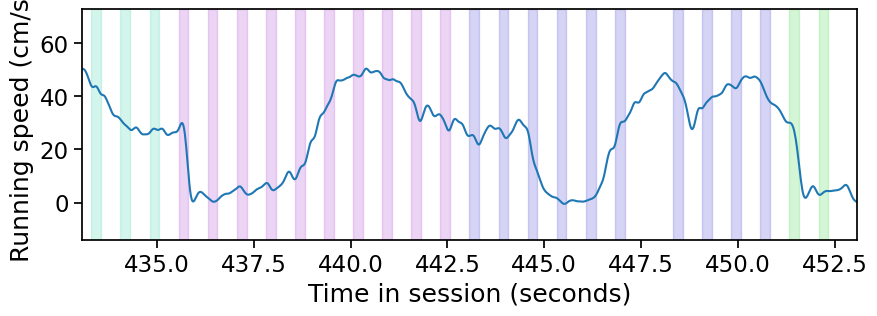

In [12]:
# Grab an image change time from the change_detection_behavior block and take a 10 second window around it

# Get change detection behavior block
stimulus_block_name = 'change_detection_behavior'
change_detection_stimuli = stimulus_presentations[(stimulus_presentations.stimulus_block_name==stimulus_block_name)]
image_changes = change_detection_stimuli[(change_detection_stimuli.is_change==True)]
# Pick the 15th image change
image_change_time = image_changes.start_time.values[11]
# Get a +/- 10 second window
window_start = image_change_time-10
window_end = image_change_time+10

# Get all stimuli in this window
window_stimuli = change_detection_stimuli[(change_detection_stimuli.start_time>=window_start) & 
                                          (change_detection_stimuli.end_time<=window_end)]

# create colormap for image names
colors = sns.color_palette('hls', len(change_detection_stimuli.image_name.unique()))
image_colors_dict = {}
for i, image_name in enumerate(np.sort(change_detection_stimuli.image_name.unique())): 
    # omissions are white
    if image_name == 'omitted': 
        image_colors_dict[image_name] = [1, 1, 1]
    # images are in color
    else: 
        image_colors_dict[image_name] = colors[i]

# Loop through stimuli and plot them
fig, ax = plt.subplots(figsize=(10,3))
for idx, stimulus in window_stimuli.iterrows():
    image_name = stimulus['image_name']
    ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=image_colors_dict[image_name], alpha=0.25)
    
# Now plot running speed in the same window
ax.plot(running_speed.timestamps, running_speed.speed)
ax.set_ylabel('Running speed (cm/s)')
ax.set_xlabel('Time in session (seconds)')
ax.set_xlim(window_start, window_end)


Why are the mice slowing down like that? What else is going on? 

### Plot licks and rewards too

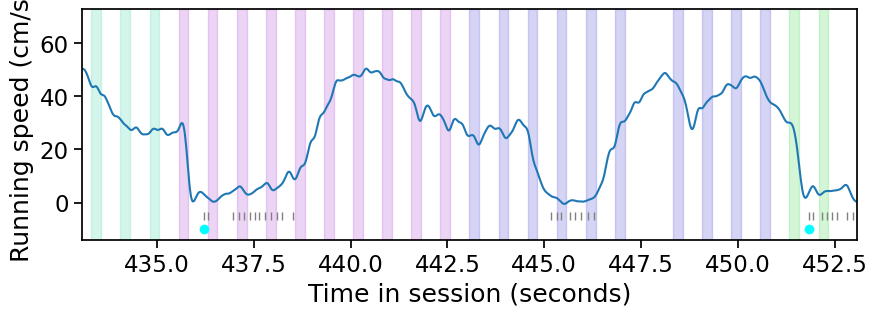

In [13]:
# Grab an image change time from the change_detection_behavior block and take a 10 second window around it

# Get change detection behavior block
stimulus_block_name = 'change_detection_behavior'
change_detection_stimuli = stimulus_presentations[(stimulus_presentations.stimulus_block_name==stimulus_block_name)]
image_changes = change_detection_stimuli[(change_detection_stimuli.is_change==True)]
# Pick the 15th image change
image_change_time = image_changes.start_time.values[11]
# Get a +/- 10 second window
window_start = image_change_time-10
window_end = image_change_time+10

# Get all stimuli in this window
window_stimuli = change_detection_stimuli[(change_detection_stimuli.start_time>=window_start) & 
                                          (change_detection_stimuli.end_time<=window_end)]

# create colormap for image names
colors = sns.color_palette('hls', len(change_detection_stimuli.image_name.unique()))
image_colors_dict = {}
for i, image_name in enumerate(np.sort(change_detection_stimuli.image_name.unique())): 
    # omissions are white
    if image_name == 'omitted': 
        image_colors_dict[image_name] = [1, 1, 1]
    # images are in color
    else: 
        image_colors_dict[image_name] = colors[i]

# Loop through stimuli and plot them
fig, ax = plt.subplots(figsize=(10,3))
for idx, stimulus in window_stimuli.iterrows():
    image_name = stimulus['image_name']
    ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=image_colors_dict[image_name], alpha=0.25)
    
# Now plot running speed in the same window
ax.plot(running_speed.timestamps, running_speed.speed)
ax.set_ylabel('Running speed (cm/s)')
ax.set_xlabel('Time in session (seconds)')
ax.set_xlim(window_start, window_end)

# Finally plot lick and reward times
# Licks
licks = behavior_session.licks.copy()
window_licks = licks[(licks.timestamps>=window_start) & (licks.timestamps<=window_end)]
for idx, lick in window_licks.iterrows():
    ax.plot(lick.timestamps, -5, '|', color='gray')

# Rewards
rewards = behavior_session.rewards.copy()
window_rewards = rewards[(rewards.timestamps>window_start) & (rewards.timestamps<window_end)]
for idx, reward in window_rewards.iterrows():
    ax.plot(reward.timestamps, -10, marker='o', color='cyan')



Remember, you can go to the DataBook to learn more about the task structure: 

https://allenswdb.github.io/physiology/stimuli/visual-behavior/VB-Behavior.html

![vbo_task_page.png](../../resources/vbo_task_page.png)

## Plot neural activity for one imaging plane during a session 

Above we looked at a behavior session using the `behavior_session_table`. Sometimes behavior sessions also have ophys, but other times they dont, for sessions where the mouse was still learning the task, or ophys sessions where the QC criteria were not met (but the behavior data is still provided). 

To get ophys sessions you can use the `ophys_session_table`. But, if you had read the databook you would know that each ophys session could contain multiple imaging planes, and the ophys data is provided on a plane by plane basis. 

To identify individual imaging planes within a given ophys session, you use the `ophys_experiment_table`. 

In [14]:
ophys_experiment_table.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,4


In [15]:
# Pick a random experiment
ophys_experiment_id = ophys_experiment_table.index.values[0]

In [16]:
# Load the data using the cache
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

/Users/marinag/anaconda3/envs/swdb_2024/lib/python3.8/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


In [17]:
# Check metadata to see what conditions this experiment was performed under
ophys_experiment.metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 206,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_1_images_A',
 'date_of_acquisition': datetime.datetime(2019, 9, 20, 9, 59, 38, 837000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('592420fb-911d-41c5-8763-4ebdeb0ef416'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '457841',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 951520319,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1018028342,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 150,
 'targeted_imaging_depth': 150,
 'imaging_plane_group': 0,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 951980471,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 951410079,
 'targeted_structure': 'VISp'}

What do the cells look like? 

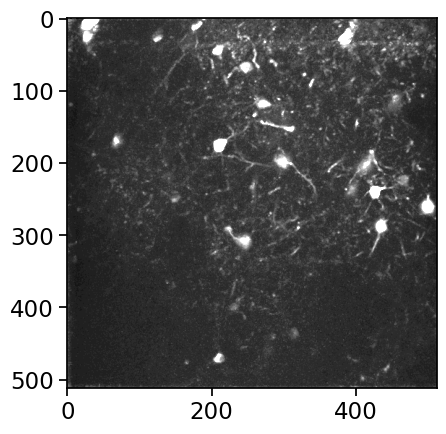

In [18]:
# Plot the maximum intensity projection
plt.imshow(ophys_experiment.max_projection, cmap='gray', vmin=0, vmax=np.percentile(ophys_experiment.max_projection, 99))

What does the neural activity look like? 

In [19]:
# Get normalized fluorescence traces
dff_traces = ophys_experiment.dff_traces.copy()
dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1086613265,1080743723,"[0.9365729093551636, 0.5824856162071228, 1.296..."
1086613823,1080743752,"[0.555761456489563, 0.7478731870651245, 0.4397..."
1086619526,1080743754,"[0.2593991160392761, 0.30149346590042114, 0.34..."
1086614149,1080743763,"[0.4112476706504822, 0.1977161169052124, 0.143..."
1086614351,1080743765,"[0.08977238088846207, 0.0746675506234169, 0.26..."


In [20]:
# Get deconvolved events
events = ophys_experiment.events.copy()
events.head()

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086613265,1080743723,"[0.0, 0.0, 0.5568727052177824, 0.0, 0.46726365...","[0.0, 0.0, 0.40076209492295517, 0.148502141158...",0.0484,0.068267
1086613823,1080743752,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1441,0.118111
1086619526,1080743754,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0966,0.097046
1086614149,1080743763,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0771,0.086072
1086614351,1080743765,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0801,0.088142


In [21]:
# Get ophys timestamps
ophys_timestamps = ophys_experiment.ophys_timestamps.copy()
ophys_timestamps

array([   9.26356,    9.35677,    9.44998, ..., 4513.62526, 4513.71849,
       4513.81173])

Text(0, 0.5, 'dF/F')

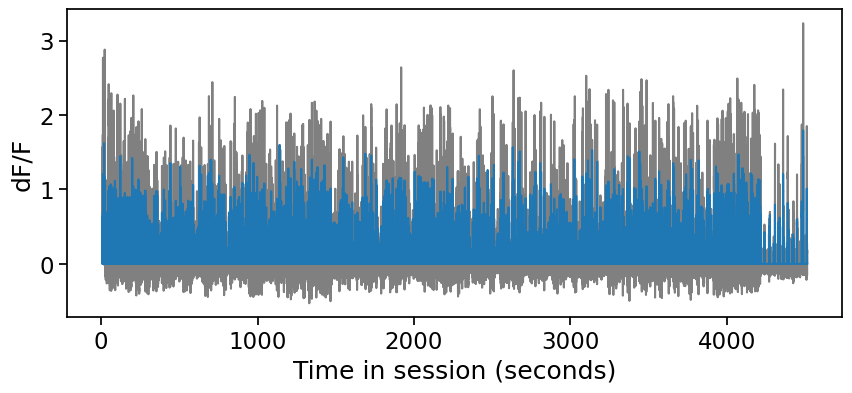

In [22]:
# Plot dF/F and events for one cell
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(ophys_timestamps, dff_traces.iloc[0]['dff'], color='gray', label='dF/F')
ax.plot(ophys_timestamps, events.iloc[0]['events'], color=sns.color_palette()[0], label=events)
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('dF/F')


(1000.0, 1040.0)

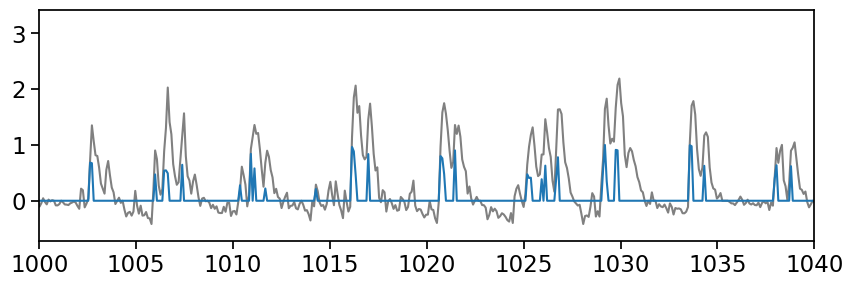

In [23]:
# Try zooming in
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(ophys_timestamps, dff_traces.iloc[0]['dff'], color='gray', label='dF/F')
ax.plot(ophys_timestamps, events.iloc[0]['events'], color=sns.color_palette()[0], label=events)
ax.set_xlim(1000, 1040)

What is causing this cell to be active in such a regular pattern? Is it the stimulus?

### Plot stimuli with neural activity 

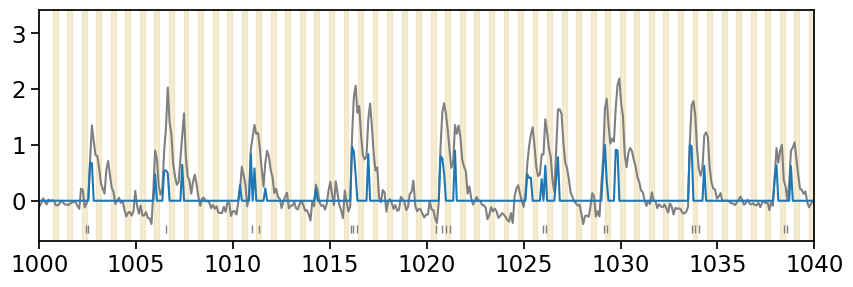

In [24]:
# Window in session to plot
window_start = 1000
window_end = 1040

# Zoomed in plot of activity
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(ophys_timestamps, dff_traces.iloc[0]['dff'], color='gray', label='dF/F')
ax.plot(ophys_timestamps, events.iloc[0]['events'], color=sns.color_palette()[0], label=events)
ax.set_xlim(window_start, window_end)

# Get stimulus presentations for this experiment
stimulus_presentations = ophys_experiment.stimulus_presentations.copy()
# Get change detection behavior block
stimulus_block_name = 'change_detection_behavior'
change_detection_stimuli = stimulus_presentations[(stimulus_presentations.stimulus_block_name==stimulus_block_name)]

# Get all stimuli in this window
window_stimuli = change_detection_stimuli[(change_detection_stimuli.start_time>=window_start) & 
                                          (change_detection_stimuli.end_time<=window_end)]

# create colormap for image names
colors = sns.color_palette('hls', len(change_detection_stimuli.image_name.unique()))
image_colors_dict = {}
for i, image_name in enumerate(np.sort(change_detection_stimuli.image_name.unique())): 
    # omissions are white
    if image_name == 'omitted': 
        image_colors_dict[image_name] = [1, 1, 1]
    # images are in color
    else: 
        image_colors_dict[image_name] = colors[i]

# Loop through stimuli and plot them
for idx, stimulus in window_stimuli.iterrows():
    image_name = stimulus['image_name']
    ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=image_colors_dict[image_name], alpha=0.25)
    
# Plot licks
licks = ophys_experiment.licks.copy()
window_licks = licks[(licks.timestamps>=window_start) & (licks.timestamps<=window_end)]
for idx, lick in window_licks.iterrows():
    ax.plot(lick.timestamps, -0.5, '|', color='gray')

# Plot rewards
rewards = ophys_experiment.rewards.copy()
window_rewards = rewards[(rewards.timestamps>window_start) & (rewards.timestamps<window_end)]
for idx, reward in window_rewards.iterrows():
    ax.plot(reward.timestamps, -1, marker='o', color='cyan')

Well that sure is interesting! This cell appears to increase its activity just after the mouse licks! 

Lets look at another time period for the same cell. Maybe it will look different if a different stimulus is being shown.

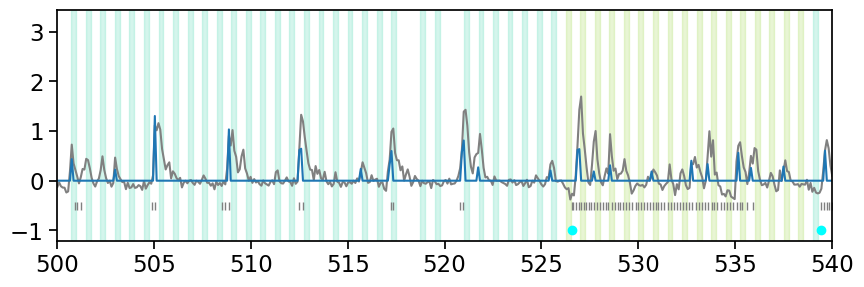

In [25]:
# Window in session to plot
window_start = 500
window_end = 540

# Zoomed in plot of activity
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(ophys_timestamps, dff_traces.iloc[0]['dff'], color='gray', label='dF/F')
ax.plot(ophys_timestamps, events.iloc[0]['events'], color=sns.color_palette()[0], label=events)
ax.set_xlim(window_start, window_end)

# Get stimulus presentations for this experiment
stimulus_presentations = ophys_experiment.stimulus_presentations.copy()
# Get change detection behavior block
stimulus_block_name = 'change_detection_behavior'
change_detection_stimuli = stimulus_presentations[(stimulus_presentations.stimulus_block_name==stimulus_block_name)]

# Get all stimuli in this window
window_stimuli = change_detection_stimuli[(change_detection_stimuli.start_time>=window_start) & 
                                          (change_detection_stimuli.end_time<=window_end)]

# create colormap for image names
colors = sns.color_palette('hls', len(change_detection_stimuli.image_name.unique()))
image_colors_dict = {}
for i, image_name in enumerate(np.sort(change_detection_stimuli.image_name.unique())): 
    # omissions are white
    if image_name == 'omitted': 
        image_colors_dict[image_name] = [1, 1, 1]
    # images are in color
    else: 
        image_colors_dict[image_name] = colors[i]

# Loop through stimuli and plot them
for idx, stimulus in window_stimuli.iterrows():
    image_name = stimulus['image_name']
    ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=image_colors_dict[image_name], alpha=0.25)
    
# Plot licks
licks = ophys_experiment.licks.copy()
window_licks = licks[(licks.timestamps>=window_start) & (licks.timestamps<=window_end)]
for idx, lick in window_licks.iterrows():
    ax.plot(lick.timestamps, -0.5, '|', color='gray')

# Plot rewards
rewards = ophys_experiment.rewards.copy()
window_rewards = rewards[(rewards.timestamps>window_start) & (rewards.timestamps<window_end)]
for idx, reward in window_rewards.iterrows():
    ax.plot(reward.timestamps, -1, marker='o', color='cyan')

Pretty cool... 

OK how about another cell?

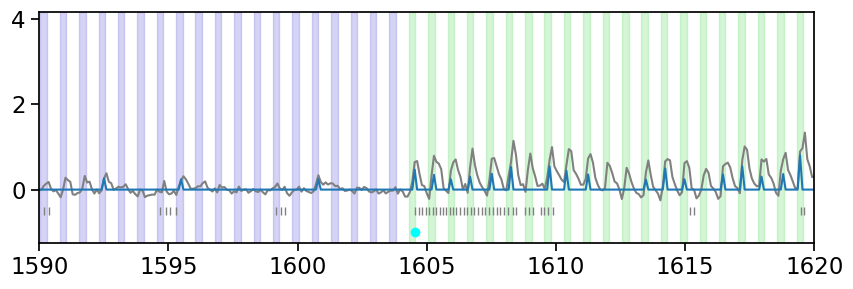

In [26]:
# Window in session to plot
window_start = 1590
window_end = 1620

c = 5

# Zoomed in plot of activity
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(ophys_timestamps, dff_traces.iloc[c]['dff'], color='gray', label='dF/F')
ax.plot(ophys_timestamps, events.iloc[c]['events'], color=sns.color_palette()[0], label=events)
ax.set_xlim(window_start, window_end)

# Get stimulus presentations for this experiment
stimulus_presentations = ophys_experiment.stimulus_presentations.copy()
# Get change detection behavior block
stimulus_block_name = 'change_detection_behavior'
change_detection_stimuli = stimulus_presentations[(stimulus_presentations.stimulus_block_name==stimulus_block_name)]

# Get all stimuli in this window
window_stimuli = change_detection_stimuli[(change_detection_stimuli.start_time>=window_start) & 
                                          (change_detection_stimuli.end_time<=window_end)]

# create colormap for image names
colors = sns.color_palette('hls', len(change_detection_stimuli.image_name.unique()))
image_colors_dict = {}
for i, image_name in enumerate(np.sort(change_detection_stimuli.image_name.unique())): 
    # omissions are white
    if image_name == 'omitted': 
        image_colors_dict[image_name] = [1, 1, 1]
    # images are in color
    else: 
        image_colors_dict[image_name] = colors[i]

# Loop through stimuli and plot them
for idx, stimulus in window_stimuli.iterrows():
    image_name = stimulus['image_name']
    ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=image_colors_dict[image_name], alpha=0.25)
    
# Plot licks
licks = ophys_experiment.licks.copy()
window_licks = licks[(licks.timestamps>=window_start) & (licks.timestamps<=window_end)]
for idx, lick in window_licks.iterrows():
    ax.plot(lick.timestamps, -0.5, '|', color='gray')

# Plot rewards
rewards = ophys_experiment.rewards.copy()
window_rewards = rewards[(rewards.timestamps>window_start) & (rewards.timestamps<window_end)]
for idx, reward in window_rewards.iterrows():
    ax.plot(reward.timestamps, -1, marker='o', color='cyan')

Looks like this cell likes images

What about the rest of the session? 

### Plot activity for all cells with stimulus blocks

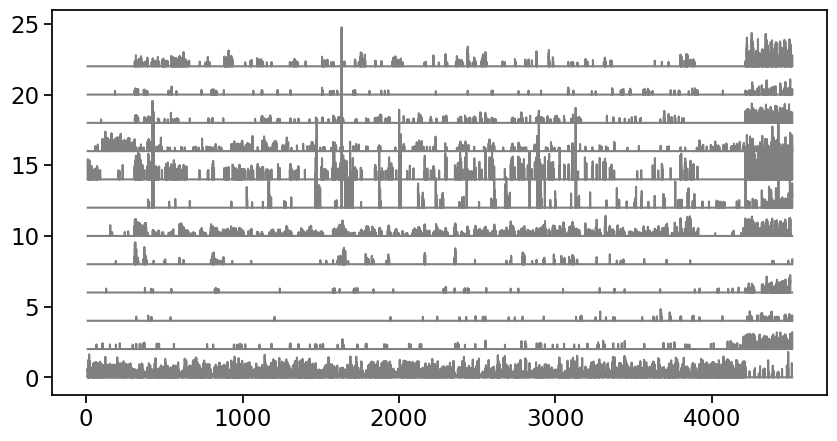

In [27]:
# Plot events for all cells
fig, ax = plt.subplots(figsize=(10, 5))
for i, cell_specimen_id in enumerate(events.index.values): 
    ax.plot(ophys_timestamps, events.loc[cell_specimen_id]['events']+(i*2), color='gray')    

Why are some cells so active at the end?

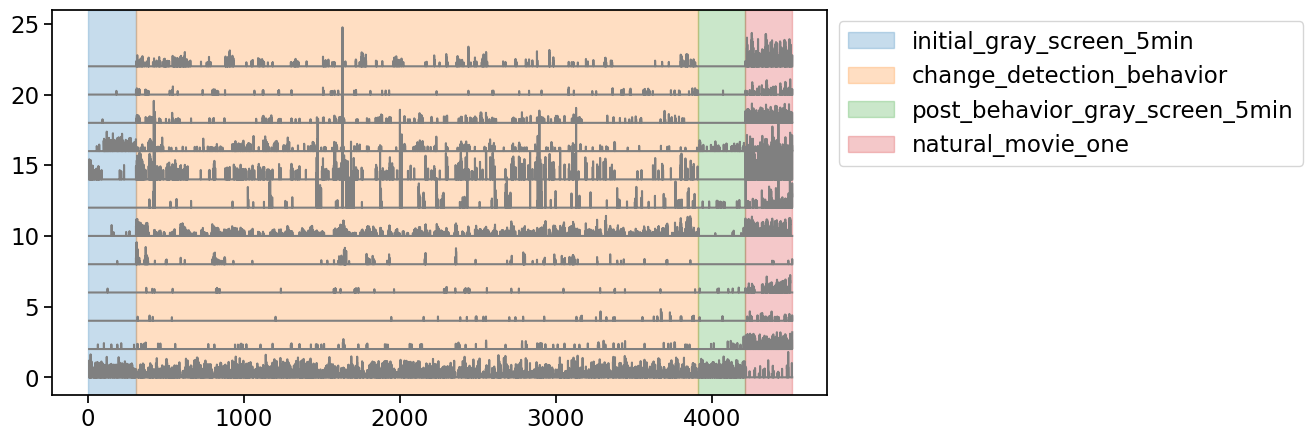

In [28]:
# Plot events for all cells
fig, ax = plt.subplots(figsize=(10, 5))
for i, cell_specimen_id in enumerate(events.index.values): 
    ax.plot(ophys_timestamps, events.loc[cell_specimen_id]['events']+(i*2), color='gray')    

# Iterate through stimulus blocks and show them in color
colors = sns.color_palette()
for i, stimulus_block_name in enumerate(stimulus_presentations.stimulus_block_name.unique()): 
    stimulus_block_data = stimulus_presentations[stimulus_presentations.stimulus_block_name==stimulus_block_name]
    ax.axvspan(xmin=stimulus_block_data.start_time.values[0], xmax=stimulus_block_data.end_time.values[-1], 
               color=colors[i], alpha=0.25, label=stimulus_block_name)
ax.legend(bbox_to_anchor=(1,1))

That cell at the end is pretty cool, looks like it is suppressed by the natural movie stimulus compared to during the task or gray screen periods

### What about other cell types? 

You can look at the DataBook to learn about the different genotypes and how to find their data. 

https://allenswdb.github.io/physiology/ophys/visual-behavior/VBO-Dataset.html#mouse-specific-metadata


![vbo_mouse_lines.png](../../resources/vbo_mouse_lines.png)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3> Homework / Futher exploration</h3>

<p>

**Exploring the metadata tables**
   * What are the differences between the `behavior_session_table` and the `ophys_session_table`?
   * What are the unique values of `full_genotype`?
   * What does the `ophys_cells_table` contain? Can you link the information in this table with the `ophys_experiment_table`?
<p>

**Neural activity & transgenic lines**
   * What do the max intensity projections look like for different genotypes? 
   * How many cells are there in experiments from different genotypes? 
   * What do single cell and population activity look like for different genotypes?
<p>

**Stimuli & behavior**
   * What are all the unique columns of the `stimulus_presentations` table? 
   * How does pupil diameter change across a session or right after an image change? 
   * Investigate relationship of running speed and pupil diameter for image changes and image omissions
   * Do mice lick after omissions? 
<p>

**Multi-plane, longitudinal imaging**
   * What are the unique values of `project_code`? Explore the DataBook to figure out what these mean.
   * For a `VisualBehaviorMultiscope` session, what are the imaging depths and targeted structures that were recorded? 
   * What are the imaging depths and targeted structures for a session from project code = `VisualBehaviorMultiscope4areasx2d`?
   * Find a `cell_specimen_id` in the `ophys_cells_table`. How many unique `ophys_experiment_id`s is it associated with? 
<p>

**Novelty & behavioral context**
   * What are the unique values of `session_type` in the metadata tables? Are they different in the `behavior_session_table` and `ophys_session_table`?
   * What are the unique values of the `passive` column of the metadata tables? What `session_types` exist for passive vs. active? 
   * What is the `prior_exposures_to_image_set` column of the metadata tables? What is the `experience_level` column? How about the `image_set` column? How do they relate to each other?
<p>

**Neural activity & session types**
   * Plot running & pupil across stimulus blocks / trial types for active & passive sessions for the same mouse
   * Plot neural activity across stimulus blocks / trial types for familiar vs novel for the same cells
<p>


</div>